In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

import time

%matplotlib inline


In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving solar.csv to solar.csv


In [4]:
import pandas as pd
import numpy as np
#load .csv file
df = pd.read_csv("solar.csv")
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


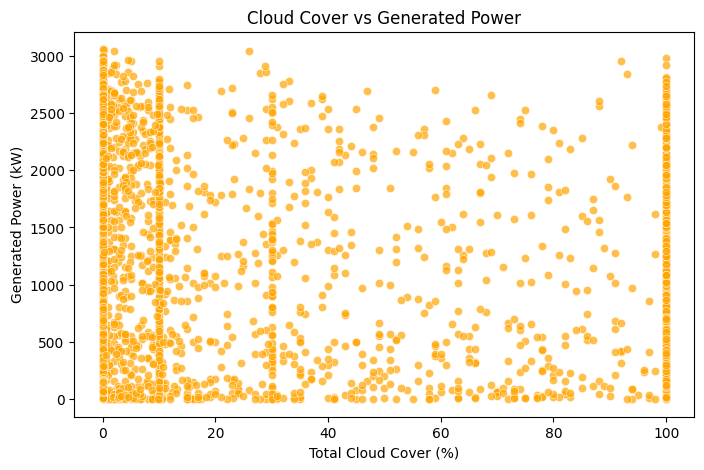

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Statistical Analysis
stats_summary = df.describe()

# 2. Correlation Matrix
correlation_matrix = df.corr()

# 4. Visualization - Cloud Cover vs Generated Power
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="total_cloud_cover_sfc", y="generated_power_kw", alpha=0.7, color="orange")
plt.title("Cloud Cover vs Generated Power")
plt.xlabel("Total Cloud Cover (%)")
plt.ylabel("Generated Power (kW)")
plt.show()

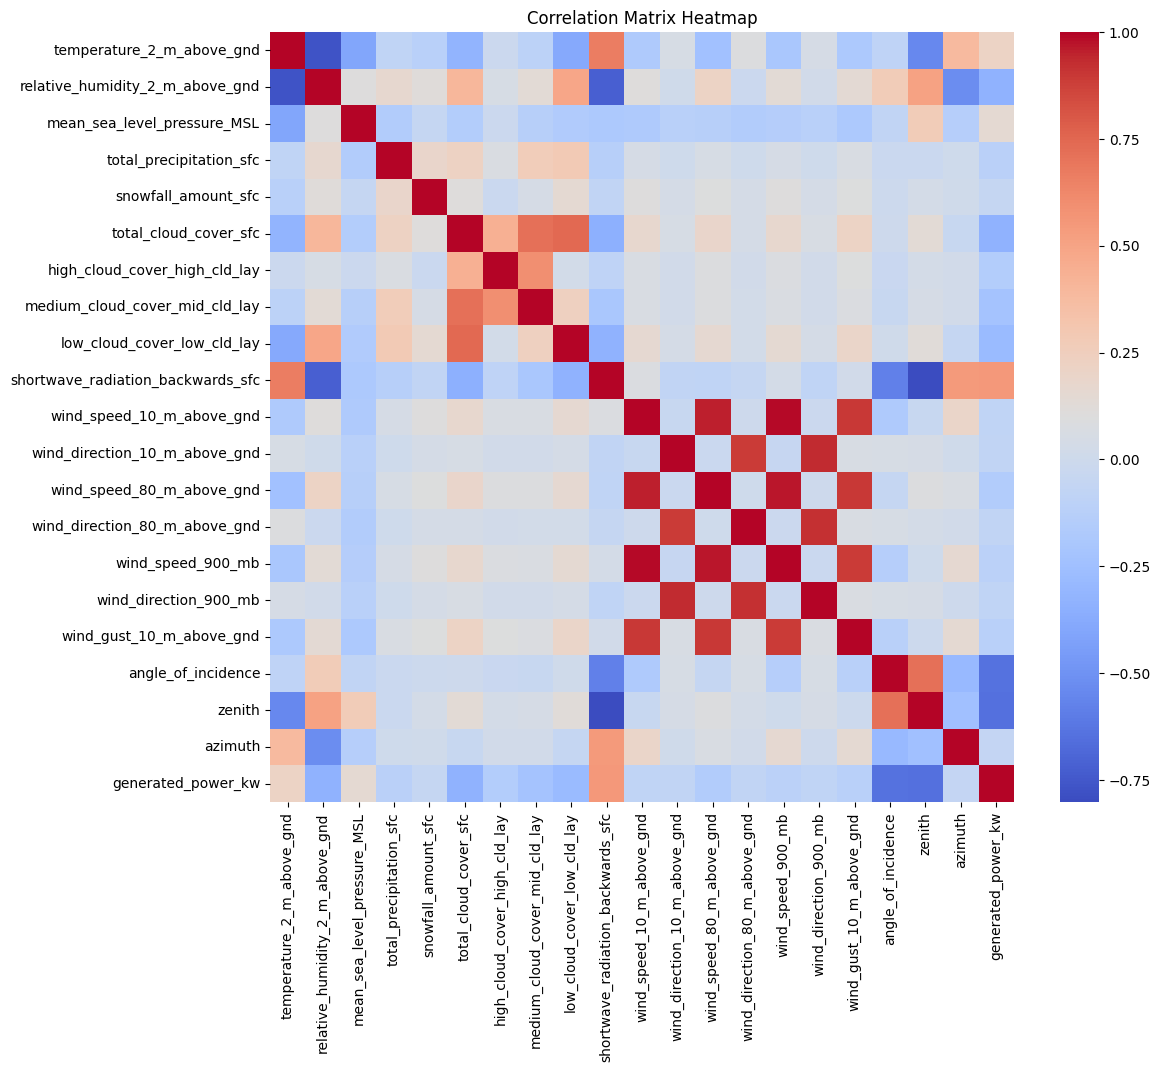

(       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
 count                4213.000000                      4213.000000   
 mean                   15.068111                        51.361025   
 std                     8.853677                        23.525864   
 min                    -5.350000                         7.000000   
 25%                     8.390000                        32.000000   
 50%                    14.750000                        48.000000   
 75%                    21.290000                        70.000000   
 max                    34.900000                       100.000000   
 
        mean_sea_level_pressure_MSL  total_precipitation_sfc  \
 count                  4213.000000              4213.000000   
 mean                   1019.337812                 0.031759   
 std                       7.022867                 0.170212   
 min                     997.500000                 0.000000   
 25%                    1014.500000             

In [7]:
# 5. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

(stats_summary, correlation_matrix)